In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf
tf.__version__

'2.10.0'

In [55]:
dataset = pd.read_csv('./Churn_Modelling.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values
print(dataset.iloc[0, :])

RowNumber                  1
CustomerId          15634602
Surname             Hargrave
CreditScore              619
Geography             France
Gender                Female
Age                       42
Tenure                     2
Balance                  0.0
NumOfProducts              1
HasCrCard                  1
IsActiveMember             1
EstimatedSalary    101348.88
Exited                     1
Name: 0, dtype: object


In [56]:
print(X[0])

[619 'France' 'Female' 42 2 0.0 1 1 1 101348.88]


In [57]:
## ENCODING CATEGORICAL DATA

#### Label Encoding

In [58]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])


In [39]:
### One Hot Encoding on Country 

In [59]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))


In [60]:
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [62]:
## FEATURE SCALING

In [68]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [69]:
print(X[0])
print(X_train[0])
print(y)
print(y_train)

[1.0 0.0 0.0 619 0 42 2 0.0 1 1 1 101348.88]
[-1.01558815  1.76021608 -0.57468161 -0.73550706 -1.08726059  0.01526571
  0.00886037  0.67316003  2.53503394 -1.55362351 -1.03446007 -1.64080994]
[1 0 1 ... 1 1 0]
[1 0 0 ... 0 0 1]


In [70]:
## Building THE ANN 

In [75]:
ann = tf.keras.models.Sequential()

## ADDING THE INPUT LAYER
## FUlly Connected  Hidden Layer with 6 Neurons
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))

## Adding the second hidden layer
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))

# ADDING THE OUTPUT LAYER
ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [76]:
## PART 3 - Training

In [78]:
## COMPILING 
## Optimizer is the function used to calculate the cost value of model, which is used to
## adjust the weights of every synapse during backpropogation process. 
## Stochasti Gradient Desccent is considered to be the best one 
## And ADAM optimizer is the one carrying it

## LOSS FUNCTION duing binary classification - binary_crossentropy
##                       non-binary Classification = categorical_crossentropy
##                                   activation = 'soft_max'

ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## Training ANN Training Set
## Batch Learning,  compares the predicted results with the real results after a batch of certain entries so that 
## Cost function and weight manipulation can be reduced to the number of batches, rather than for every data entry 
ann.fit(X_train, y_train, batch_size = 32, epochs = 75 )

Epoch 1/75
235/235 [==============================] - 1s 2ms/step - loss: 0.3412 - accuracy: 0.8592
Epoch 2/75
235/235 [==============================] - 0s 1ms/step - loss: 0.3404 - accuracy: 0.8620
Epoch 3/75
235/235 [==============================] - 0s 2ms/step - loss: 0.3396 - accuracy: 0.8613
Epoch 4/75
235/235 [==============================] - 0s 1ms/step - loss: 0.3393 - accuracy: 0.8603
Epoch 5/75
235/235 [==============================] - 0s 1ms/step - loss: 0.3388 - accuracy: 0.8609
Epoch 6/75
235/235 [==============================] - 0s 1ms/step - loss: 0.3386 - accuracy: 0.8604
Epoch 7/75
235/235 [==============================] - 0s 1ms/step - loss: 0.3382 - accuracy: 0.8600
Epoch 8/75
235/235 [==============================] - 0s 1ms/step - loss: 0.3378 - accuracy: 0.8617
Epoch 9/75
235/235 [==============================] - 0s 2ms/step - loss: 0.3374 - accuracy: 0.8600
Epoch 10/75
235/235 [==============================] - 0s 1ms/step - loss: 0.3371 - accuracy: 0.8603

In [85]:
## Predicting the Results 
print(type(y_test))

<class 'numpy.ndarray'>


In [97]:
print(ann.predict(sc.transform([[1, 0, 1, 600, 0, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)
## As the Function used in the output layer is the sigmoid function 
## It will return the result as a probability between 0 & 1
## For our convenience we determine that anything above 0.5 is true and below that is false

1/1 [==============================] - 0s 31ms/step
[[ True]]


In [96]:
model = ann.predict(X_test)
model = (model > 0.5)

print(np.concatenate((model.reshape(len(model), 1), y_test.reshape(len(y_test), 1)),1))

79/79 [==============================] - 0s 1ms/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


0.8636


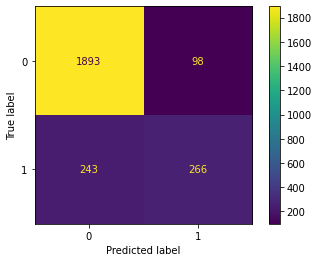

In [98]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, model))
print(accuracy_score(y_test, model))
disp.plot()